# Assignment 3

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Task 1: MLE computation

As you know, we can think about linear regression from the optimization point of view (as the problem of minimizing the root mean squared error), but we can also consider it from the probabilistic point of view.
Let's consider the following equation:

\begin{equation*}
y_i=x_i B_0+\varepsilon_i
\end{equation*}

where $y_i$ is the dependent variable, $x_i$ is a $1 \times K$ vector of regressors, $\beta_0$ is the $K \times 1$ vector of regression coefficients to be estimated and $\varepsilon_i$ is an unobservable error term.

The sample is made up of $N$ IID observations $\left(y_i, x_i\right)$.
The regression equations can be also written as

\begin{equation*}
y=X \beta_0+\varepsilon
\end{equation*}

where the $N \times 1$ vector of observations of the dependent variable is denoted by $y$, the $N \times K$ matrix of regressors is denoted by $X$, and the $N \times 1$ vector of error terms is denoted by $\varepsilon$.

As everybody interested in probability theory knows, we always have to have some assumptions. In this case, we assume that the vector of errors $\varepsilon$ has a multivariate normal distribution conditional on $x$, with mean equal to 0 and covariance matrix equal to

\begin{equation*}
\sigma_0^2 I
\end{equation*}

where $l$ is the $N \times N$ identity matrix and

\begin{equation*}
\sigma_0^2=\operatorname{Var}\left[\varepsilon_i \mid X\right]
\end{equation*}

is the second parameter to be estimated.
Furthermore, it is assumed that the matrix of regressors $x$ has full-rank.

Those assumptions have interesting implications:
- the covariance matrix of $\varepsilon$ is diagonal implies that the entries of $\varepsilon$ are mutually independent (i.e., $\varepsilon_i$ is independent of $\varepsilon_j$ for $i \neq j$.)
- they all have a normal distribution with mean 0 and variance $\sigma_0^2$.

The fact that we transform normal random variables linearly makes the dependent variable $y_i$ conditionally normal, with mean $x_i \beta_0$ and variance $\sigma_0^2$. Therefore, its cdf is

\begin{equation*}
f_Y\left(y_i \mid X\right)=\left(2 \pi \sigma_0^2\right)^{-1 / 2} \exp \left(-\frac{1}{2} \frac{\left(y_i-x_i \beta_0\right)^2}{\sigma_0^2}\right)
\end{equation*}

Having this probability model we can use it to do estimation of regression parameters using Maximum Likelihood Estimation method.

The first-order conditions for a maximum are

\begin{equation*}
\begin{aligned}
& \nabla_\beta l\left(\beta, \sigma^2 ; y, X\right)=0 \\
& \frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right)=0
\end{aligned}
\end{equation*}

where $\nabla_\beta$ indicates the gradient calculated with respect to $\beta$, that is, the vector of the partial derivatives of the log-likelihood with respect to the entries of $\beta$. The gradient is

\begin{equation*}
\begin{aligned}
& \nabla_\beta l\left(\beta, \sigma^2: y, X\right) \\
= & \nabla_\beta\left(-\frac{N}{2} \ln (2 \pi)-\frac{N}{2} \ln \left(\sigma^2\right)-\frac{1}{2 \sigma^2} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2\right) \\
= & \frac{1}{\sigma^2} \sum_{i=1}^N x_i^{\top}\left(y_i-x_i \beta\right) \\
= & \frac{1}{\sigma^2}\left(\sum_{i=1}^N x_i^{\top} y_i-\sum_{i=1}^N x_i^{\top} x_i \beta\right)
\end{aligned}
\end{equation*}

which is equal to zero only if

\begin{equation*}
\sum_{i=1}^N x_i^{\top} y_i-\sum_{i=1}^N x_i^{\top} x_i \beta=0
\end{equation*}


Therefore, the first of the two equations is satisfied if

\begin{equation*}
\beta=\left(\sum_{i=1}^N x_i^{\top} x_i\right)^{-1} \sum_{i=1}^N x_i^{\top} y_i=\left(X^{\top} X\right)^{-1} X^{\top} y
\end{equation*}

where we have used the assumption that $x$ has full rank and, as a consequence, $x^x x$ is invertible.


### Subtask A:
Prove that the MLE for variance is equal to
$$
\widehat{\sigma}_n^2=\frac{1}{N} \sum_{i=1}^N\left(y_i-x_i \widehat{\beta}_N\right)^2
$$

### MLE for Logistic regression

In the logistic regression model, the output variable $y_i$ is a Bernoulli random variable (it can take only two values, either 1 or 0 ) and

\begin{equation*}
\mathrm{P}\left(y_i=1 \mid x_i\right)=S\left(x_i \beta\right)
\end{equation*}

where

\begin{equation*}
S(t)=\frac{1}{1+\exp (-t)}
\end{equation*}

is the logistic function, $x_i$ is a $1 \times K$ vector of inputs and $\beta$ is a $K \times 1$ vector of coefficients.

Furthermore,

\begin{equation*}
\mathrm{P}\left(y_i=0 \mid x_i\right)=1-S\left(x_i \beta\right)
\end{equation*}


The vector of coefficients $\beta$ is the parameter to be estimated by maximum likelihood.
We assume that the estimation is carried out with an IID sample comprising $N$ data points

\begin{equation*}
\left(y_i, x_i\right) \text { for } i=1, \ldots, N
\end{equation*}

### Subtask B
1. Find the form of the loglikelihood.
2. Compute the gradient of logistic function with respect to $\beta$

You can either tex your solution and put it in this notebook or attach photos of your solution.

## SOLUTION OF THE TASK 1

### Subtask A
Proof:

\begin{equation*}
\begin{aligned}
\frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right)&=0 \\
-\frac{N}{2}\left(\frac{1}{\hat{\sigma}^2} \right)+\frac{1}{2\left(\hat{\sigma}^2\right)^2}\sum_{i=1}^N\left(y_i- x_i \hat{\beta} \right)^2 &=0 \\
\frac{N}{2}\left(\frac{1}{\hat{\sigma}^2} \right) &= \frac{1}{2\left(\hat{\sigma}^2\right)^2}\sum_{i=1}^N\left(y_i- x_i \hat{\beta} \right)^2 \\
N\hat{\sigma}^2 &= \sum_{i=1}^N\left(y_i- x_i \hat{\beta} \right)^2 \\
\hat{\sigma}^2 &=\frac{1}{N}\sum_{i=1}^N\left(y_i- x_i \hat{\beta} \right)^2\\
\end{aligned}
\end{equation*}

QED.

### Subtask B

#### 1.

\begin{equation*}
\begin{aligned}
L\left(\beta; y, X \right)&= \prod_{i=1}^N
\left( S(x_i\beta) \right)^{y_i} \left(1- S(x_i\beta)   \right)^{1-y_i}
\end{aligned}
\end{equation*}

\begin{equation*}
\begin{aligned}
l\left(\beta; y, X \right)&= \log(L\left(\beta; y, X \right))\\
&= \sum_{i=1}^N y_i\log(S(x_i\beta))+(1-y_i)\log(1-S(x_i\beta))\\
&= \sum_{i=1}^N y_i\left(\log\left(\frac{S(x_i\beta)}{1-S(x_i\beta)}\right)\right)
+\log(1-S(x_i\beta))\\
&= \sum_{i=1}^N y_i \log(\exp(x_i\beta))+\log\left(\frac{\exp(-x_i\beta)}{1+\exp(-x_i\beta)} \cdot \frac{\exp(x_i\beta)}{\exp(x_i\beta)} \right)\\
&= \sum_{i=1}^N y_ix_i\beta-\log(1+\exp(x_i\beta))
\end{aligned}
\end{equation*}

#### 2.

\begin{equation*}
\begin{aligned}
 \nabla_\beta l\left(\beta: y, X\right)
= & \nabla_\beta\left( \sum_{i=1}^N y_ix_i\beta-\log(1+\exp(x_i\beta))\right) \\
= & \sum_{i=1}^N y_ix_i-\frac{1}{1+\exp(x_i\beta)}\cdot\exp(x_i\beta)\cdot x_i\\
= & \sum_{i=1}^N y_ix_i-\frac{x_i}{1+\exp(-x_i\beta)}\\
= & \sum_{i=1}^N (y_i - S(x_i\beta))x_i
\end{aligned}
\end{equation*}

## Task 2: Implement Logistic Regression

Use derivations form previous task to perform logistic regression. Provide a custom implemntation of gradient descent for this taks.
**Bonus points** provide also implementation of other optimization algorithm of your choice, eg. Newton-Rhapson method.


## SOLUTION OF THE TASK 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class LogisticRegression():
    def __init__(self, data_dim, threshold=0.5, weights = None):
        self.dim = data_dim
        self.threshold = threshold
        self.history_weights = []

        if weights is not None and weights.shape[0] == data_dim+1:
            self.w = weights
        else:
            self.w = np.zeros(data_dim+1)

        self.history_weights.append(self.w.copy())

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.w))

    def predict(self, X):
        pred = self.predict_prob(X)
        return np.asarray(list(map(lambda x: 1 if x >= self.threshold else 0, pred)))

    def _grad(self, X, y):
        #calculate the gradient of the cost function with respect to w
        n = X.shape[0]
        predictions = self.predict_prob(X)
        return 1/n * np.dot(X.T, (predictions - y))

    def _update(self, grad):
        #update the weights of the model
        self.w -= self.learning_rate * grad

    def score(self, X, y):
        #append additional column to incorporate bias
        x_ext = np.hstack((np.full(shape=(X.shape[0], 1), fill_value=1), X))
        #calculate the predicted probability of y=1
        pred = self.predict_prob(x_ext)
        #use the threshold to obtain classification
        pred = np.asarray(list(map(lambda x: 1 if x > self.threshold else 0, pred)))
        #return the accuracy score
        return 1 - sum(abs(pred - y))/X.shape[0]

    def regularize_grad(self, method):
        if method.upper() == "L1":
          reg_term = np.sign(self.w)
          reg_term[0] = 0
          return reg_term
        elif method.upper() == "L2":
          reg_term = self.w
          reg_term[0] = 0
          return reg_term
        else:
          raise ValueError("Regularization method must be either 'L1' or 'L2'")

    def fit(self, X, y, iterations=100, learning_rate=0.1, batch_size=100,
            regularize=False, method=None, lambd = 0.3):
        self.learning_rate = learning_rate
        #append additional column to incorporate bias
        X = np.hstack((np.full(shape=(X.shape[0], 1), fill_value=1), X))
        for _ in range(iterations):
            for i in range(0, X.shape[0], batch_size):
                #calculate an approximation of the true gradient based on a batch of examples
                up = min(X.shape[0], i+batch_size)
                grad = self._grad(X[i:up, :], y[i:up, ])
                # apply regularization
                if regularize:
                    grad += lambd * self.regularize_grad(method)
                #update the weights
                self._update(grad)
                #save weights in the history
                self.history_weights.append(self.w.copy())
        self.history_weights = np.asarray(self.history_weights)

    def apply_regularization(self, X, y, iterations=100, learning_rate=0.1,
                             lambd = 0.3, method="L1"):
        self.fit(X, y, iterations=iterations, learning_rate=learning_rate,
                    regularize=True, lambd=lambd, method=method)

    def _hessian(self, X, y):
        n = X.shape[0]
        predictions = self.predict_prob(X)
        # diagonal matrix of weights
        diag = np.diag(predictions * (1 - predictions))
        return 1/n * np.dot(X.T, np.dot(diag, X))

    def fit_Newton_Raphson(self, X, y, iterations=100, tol=1e-6):
        #append additional column to incorporate bias
        X = np.hstack((np.full(shape=(X.shape[0], 1), fill_value=1), X))
        for i in range(iterations):
            grad = self._grad(X, y)
            hessian = self._hessian(X, y)
            # update weights using Newton-Raphson alg.
            try:
              hesian_inv = np.linalg.inv(hessian)
            except np.linalg.LinAlgError:
              print("Hessian is not invertible")
              break
            delta = np.dot(hesian_inv, grad)
            self.w -= delta
            # save weights in the history
            self.history_weights.append(self.w.copy())
            # check the convergence
            if np.linalg.norm(delta) < tol:
                break
        self.history_weights = np.asarray(self.history_weights)

## Task 3: Classification for Imbalanced Data

Split the data using a technique suitable for imbalanced classes. Describe its working.

Train a logistic regression model on the below data.

In [ ]:

# Create a synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_informative=4, n_redundant=5, n_features=20, n_clusters_per_class=3,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

# Visualize class distribution
def visualize_class_distribution(y):
    plt.bar(['Class 0', 'Class 1'], [sum(y == 0), sum(y == 1)])
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

visualize_class_distribution(y)

# Summarize dataset
print("Dataset Shape:", X.shape)
print("Class Distribution:", np.bincount(y))


Evaluate your binary classifiers using the following:
- confusion matrix,
- accuracy,
- precision,
- recall,
- F1 score,
- ROCAUC.

Please write custom functions calculating the above functions and plotting the receiver operating characteristic curve. Describe your intuition behind each metric and its suitability for imbalanced classes.



Propose, describe and implement a technique for improving the model's ability to distinguish the classes. Evaluate your approach.

## SOLUTION OF THE TASK 3

#### Center Loss

Center Loss is a technique used to reduce the variance of samples within each class. It involves minimizing the distance of samples in feature space from the class center, which leads to better separation of classes. Using Center Loss in combination with classical cross entropy provides better class discrimination.

In [ ]:
class LogisticRegressionCenterLoss():
    def __init__(self, data_dim, num_classes, threshold=0.5,
                 weights = None, lambda_c=0.1):
        self.dim = data_dim
        self.threshold = threshold
        self.history_weights = []
        self.num_classes = num_classes
        self.lambda_c = lambda_c
        # initialize class centres
        self.centers = np.zeros((num_classes, data_dim))

        if weights is not None and weights.shape[0] == data_dim+1:
            self.w = weights
        else:
            self.w = np.zeros(data_dim+1)

        self.history_weights.append(self.w.copy())

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.w))

    def predict(self, X):
        pred = self.predict_prob(X)
        return np.asarray(list(map(lambda x: 1 if x >= self.threshold else 0, pred)))

    def _loss(self, X, y):
        #calculate the loss of the model
        predictions = self.predict_prob(X)
        cross_entropy_loss = -np.mean(y * np.log(predictions + 1e-9) + (1 - y)
         * np.log(1 - predictions + 1e-9))
        center_loss = 0.0

        for i in range(X.shape[0]):
            center_loss += np.linalg.norm(X[i] - self.centers[int(y[i])]) ** 2
        center_loss /= 2 * X.shape[0]

        return cross_entropy_loss + self.lambda_c * center_loss

    def update_centers(self, X, y, lr=0.5):
        for cl in range(self.num_classes):
          class_samples = X[y==cl]
          if len(class_samples) > 0:
            delta = np.mean(class_samples - self.centers[cl], axis=0)
            self.centers[cl] += lr * delta

    def _grad(self, X, y):
        #calculate the gradient of the cost function with respect to w
        n = X.shape[0]
        predictions = self.predict_prob(X)
        return 1/n * np.dot(X.T, (predictions - y))

    def _update(self, grad):
        #update the weights of the model
        self.w -= self.learning_rate * grad

    def score(self, X, y):
        x_ext = np.hstack((np.full(shape=(X.shape[0], 1), fill_value=1), X))
        pred = self.predict_prob(x_ext)
        pred = np.asarray(list(map(lambda x: 1 if x > self.threshold else 0, pred)))
        return 1 - sum(abs(pred - y))/X.shape[0]

    def fit(self, X, y, iterations=100, learning_rate=0.01,
            center_lr=0.5, batch_size=100):
        self.learning_rate = learning_rate
        X = np.hstack((np.full(shape=(X.shape[0], 1), fill_value=1), X))

        for _ in range(iterations):
            for i in range(0, X.shape[0], batch_size):
                up = min(X.shape[0], i+batch_size)
                grad = self._grad(X[i:up, :], y[i:up, ])
                self._update(grad)
                self.update_centers(X[:,1:], y, lr=center_lr)
                self.history_weights.append(self.w.copy())
        self.history_weights = np.asarray(self.history_weights)


#### Metrics

- **The confusion matrix** - offers a detailed view of true/false positives and negatives, helping analyze where the model errs.
- **Accuracy** - Suitable only if classes are balanced; otherwise, it can mislead as the majority class dominates.
- **Precision** - Important in scenarios where false positives are costly (e.g., fraud detection).
- **Recall** - Crucial when missing positives is more severe than false alarms (e.g., disease diagnosis).
- **F1 Score** - Balances precision and recall, making it more robust for imbalanced classes.
- **ROC AUC** - Measures overall classification performance across thresholds; high AUC indicates a well-performing model even with class imbalance.

These metrics provide a holistic view of model performance, especially for imbalanced datasets. In my opinion, to control good classification of both classes, we should use F1 score. AS in the example of this task, we want to correctly classify ones and zeros, i.e. correctly classify both classes without any errors. Of course, if we want to correctly classify only ones, we should use the recall measure, if we want to classify only zeros correctly - the precision or accuracy measure.



In [ ]:
from sklearn.metrics import roc_curve, auc

class ScoreMeasure():
    def __init__(self, y_true, y_prob, y_pred):
        self.y_true = y_true
        self.y_prob = y_prob
        self.y_pred = y_pred
        self.TP = np.sum((y_true == 1) & (y_pred == 1))
        self.TN = np.sum((y_true == 0) & (y_pred == 0))
        self.FP = np.sum((y_true == 0) & (y_pred == 1))
        self.FN = np.sum((y_true == 1) & (y_pred == 0))

    def confusion_matrix(self):
        return np.array([[self.TP, self.FN], [self.FP, self.TN]])

    def accuracy(self):
        return (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)

    def precision(self):
        return self.TP / (self.TP + self.FP)

    def recall(self):
        return self.TP / (self.TP + self.FN)

    def f1(self):
        return 2 * self.precision() * self.recall() / (self.precision() + self.recall())

    def roc_auc(self):
        fpr, tpr, thresholds = roc_curve(self.y_true, self.y_prob)
        return auc(fpr, tpr)

    def plot_roc_curve(self):
        fpr, tpr, thresholds = roc_curve(self.y_true, self.y_prob)
        plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {self.roc_auc():.2f})')
        plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    def show_descriptive_stats(self):
        print("Confusion Matrix:\n", self.confusion_matrix())
        print(f"Accuracy: {self.accuracy():.2f}")
        print(f"Precision: {self.precision():.2f}")
        print(f"Recall: {self.recall():.2f}")
        print(f"F1 Score: {self.f1():.2f}")
        print(f"ROC AUC: {self.roc_auc():.2f}")
        self.plot_roc_curve()

#### Stratified Sampling

For imbalanced datasets, the minority class can be underrepresented in a random train-test split, which negatively impacts model training and evaluation. Stratified sampling ensures that both train and test sets maintain the same class proportions as the original dataset, preserving the class balance for better model performance evaluation.

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2,
                                       stratify=y, random_state=42)

#visualize_class_distribution(y_test)

# Summarize dataset
print("Dataset Shape:", X_test.shape)
print("Class Distribution:", np.bincount(y_test))

Dataset Shape: (200, 20)
Class Distribution: [189  11]


Lowering the threshold will also affect the result. As a result, the regression will be more likely to assign class 1.

Confusion Matrix:
 [[  7   4]
 [  1 188]]
Accuracy: 0.97
Precision: 0.88
Recall: 0.64
F1 Score: 0.74
ROC AUC: 0.81


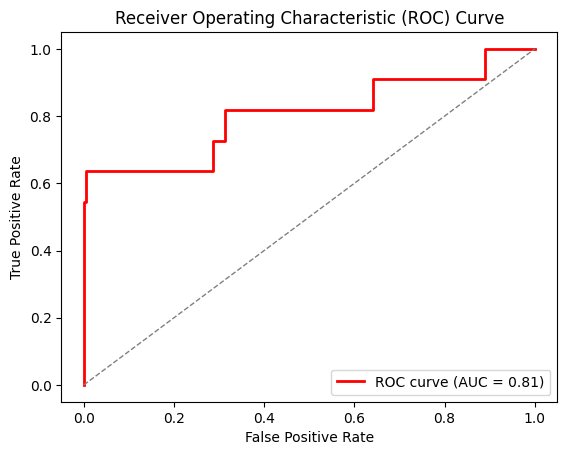

Confusion Matrix:
 [[  5   6]
 [  0 189]]
Accuracy: 0.97
Precision: 1.00
Recall: 0.45
F1 Score: 0.62
ROC AUC: 0.81


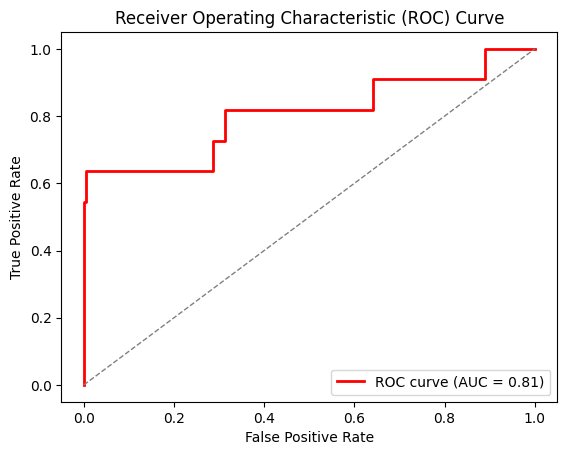

In [ ]:
model_center = LogisticRegressionCenterLoss(data_dim=X_train.shape[1],
                                        num_classes=2, threshold=0.42)
model_center.fit(X_train, y_train, iterations=1000, learning_rate=0.01)
X_test_ext = np.hstack((np.full(shape=(X_test.shape[0], 1), fill_value=1), X_test))
y_prob = model_center.predict_prob(X=X_test_ext)
y_pred = model_center.predict(X=X_test_ext)

score = ScoreMeasure(y_test, y_prob, y_pred)
score.show_descriptive_stats()

model_lr = LogisticRegression(data_dim=X_train.shape[1])
model_lr.fit(X_train, y_train, iterations=1000, learning_rate=0.01)
y_prob = model_lr.predict_prob(X=X_test_ext)
y_pred = np.asarray(list(map(lambda x: 1 if x > model_lr.threshold else 0, y_prob)))

score = ScoreMeasure(y_test, y_prob, y_pred)
score.show_descriptive_stats()


## Task 4: Optimization of Neural Networks

The **backpropagation algorithm** is the foundational algorithm in deep learning. In this task You will have to go through a single iteration of said algorithm and compare the results after updating networks weights. <br>
You are given a neural network with one input layer consisting of two input nodes ${n_1, n_2}$, one hidden layer with two neurons ${n_3, n_4}$ and an output layer with a single node $n_5$. We will denote the weight connecting $n_i$ to $n_j$ as $w_{i,j}$. A bias related to $n_i$ will be denoted as $b_i$. Parameters are initialized as follows:
* $w_{1,3} = 1.5$ ; $w_{2,3} = -2.5$ ; $b_{3} = 0.3$
* $w_{1,4} = 1$ ; $w_{2,4} = -2.5$ ; $b_{4} = 0.2$
* $w_{3,5} = 4$ ; $w_{4,5} = 3$ ; $b_{5} = -0.8$ <br>

Additionally, neurons $n_3$ and $n_4$ are equipped with the sigmoid activation function: $\sigma(x) = \frac{1}{1+e^{-x}} $<br>
Your task is to use two training examples: $x = \{ (1,2), (2,0)\}$, $y = \{-1, 6\}$ to preform a single backpropagation step - preform forward calculations and propagate the received error backwards, updating the weights. After all weights have been updated, check how the predictions change, preforming additional forward pass.

## SOLUTION OF THE TASK 4

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [ ]:
params = {
    "w13": 1.5, "w23": -2.5, "b3": 0.3,
    "w14": 1.0, "w24": -2.5, "b4": 0.2,
    "w35": 4.0, "w45": 3.0, "b5": -0.8
}

x = np.array([[1, 2], [2, 0]])
y = np.array([-1, 6])

def forward_pass(x, params):
  z3 = params["w13"] * x[0] + params["w23"] * x[1] + params["b3"]
  a3 = sigmoid(z3)

  z4 = params["w14"] * x[0] + params["w24"] * x[1] + params["b4"]
  a4 = sigmoid(z4)

  z5 = params["w35"] * a3 + params["w45"] * a4 + params["b5"]
  a5 = z5  # Output neuron has no activation (linear output)

  return z3, a3, z4, a4, z5, a5

def backward_pass(x, y, z3, a3, z4, a4, z5, a5, params):
    dz5 = a5 - y
    dw35 = dz5 * a3
    dw45 = dz5 * a4
    db5 = dz5

    da3 = dz5 * params["w35"]
    dz3 = da3 * sigmoid_derivative(z3)
    dw13 = dz3 * x[0]
    dw23 = dz3 * x[1]
    db3 = dz3

    da4 = dz5 * params["w45"]
    dz4 = da4 * sigmoid_derivative(z4)
    dw14 = dz4 * x[0]
    dw24 = dz4 * x[1]
    db4 = dz4

    gradient = {
        "dw13": dw13, "dw23": dw23, "db3": db3,
        "dw14": dw14, "dw24": dw24, "db4": db4,
        "dw35": dw35, "dw45": dw45, "db5": db5
    }

    return gradient

def update_params(params, gradients, learning_rate):
  for key in gradients:
    params[key.replace('d', '')] -= learning_rate * gradients[key]

outputs_before = []
for i, j in enumerate(x):
  z3, a3, z4, a4, z5, a5 = forward_pass(j, params)
  outputs_before.append(a5)
  gradients = backward_pass(j, y[i], z3, a3, z4, a4, z5, a5, params)

  update_params(params, gradients, learning_rate=0.1)

outputs_after = []

for i in x:
  _, _, _, _, _, a5 = forward_pass(i, params)
  outputs_after.append(a5)

print("Outputs before training:", outputs_before)
print("Outputs after training:", outputs_after)

Outputs before training: [-0.5776932960045512, 5.7089689850890295]
Outputs after training: [-0.5926392426455447, 5.802099766945859]


## Task 5: L1 & L2 Regularization for Logistic Regression

In this task we will use a synthetic dataset generated by the function `make_classification`.

1. Use a pairplot to see the relationships between the features in the dataset.
2. Apply your logistic regression model from Task 1 on this dataset and measure its accuracy.
3. Modify your implementation to account for two regularization methods: L1 and L2 and apply them to the dataset. What can you observe?
4. Which features are selected by L1 regularization? Plot the decision boundary for these features.

# (If you have not done Task 1, use `LogisticRegression` from `sklearn` to see the effects of regularization. You can get half of the points for this task if you do that.)

In [ ]:

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

dataset = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 21)])
dataset['Target'] = y

## SOLUTION OF THE TASK 5

**Attention!**

The regularization function was implemented in the class from task 2.


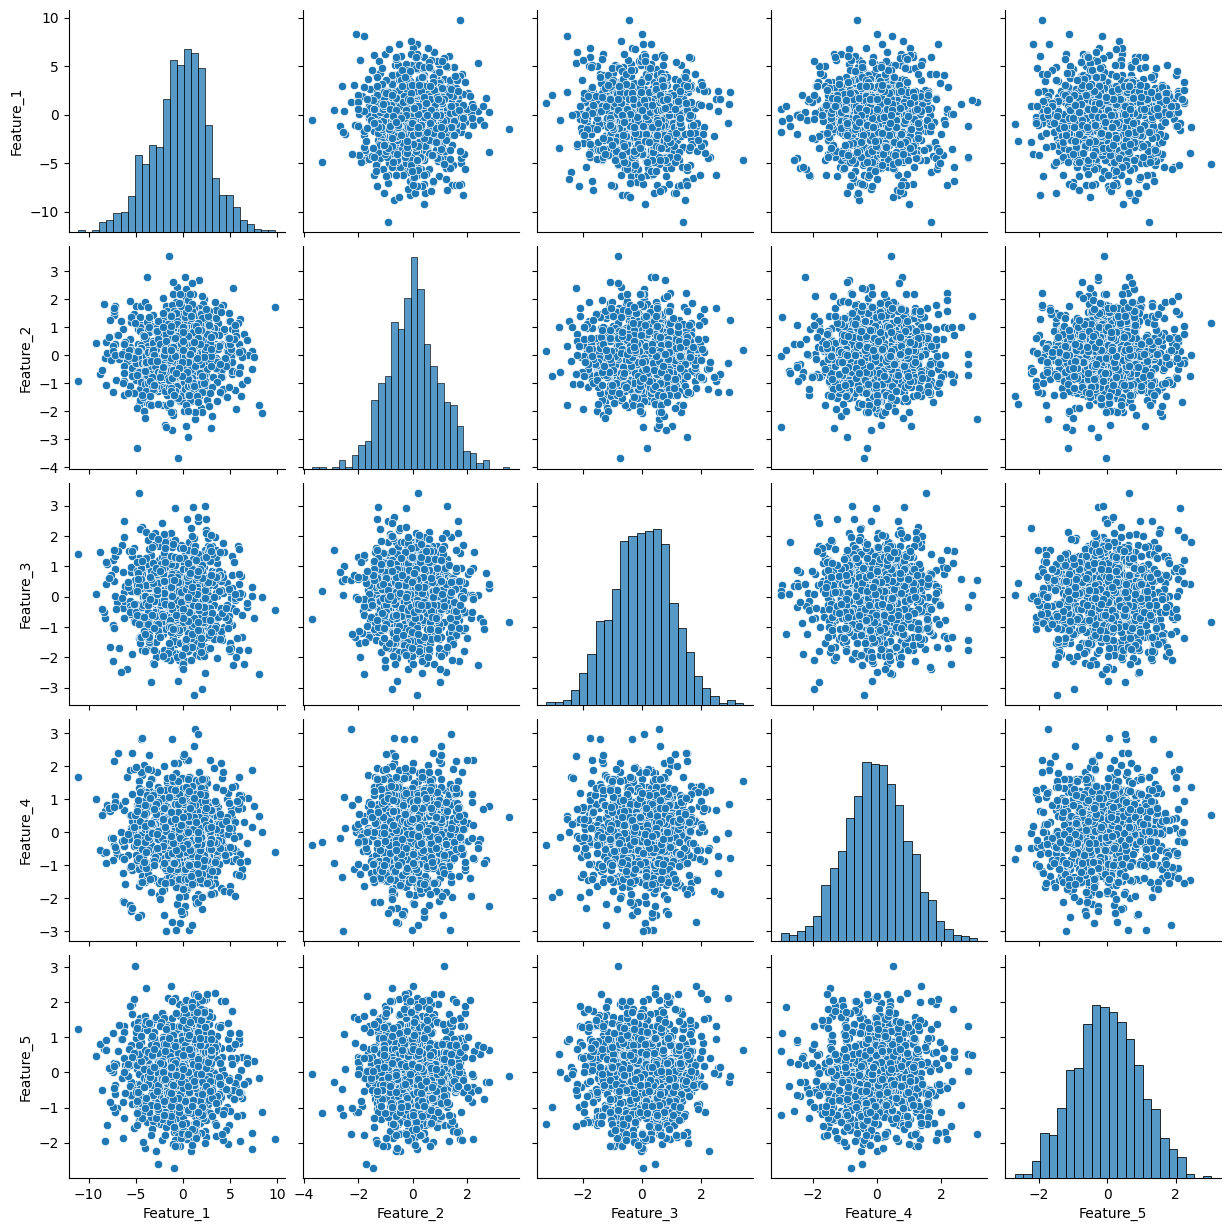

In [ ]:
import seaborn as sns

# first 5 features, you can delete iloc...
sns.pairplot(dataset.iloc[:, :5])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.05)

model_lr = LogisticRegression(data_dim=X_train.shape[1])
model_lr.fit(X_train, y_train, iterations=1000, learning_rate=0.01)
model_lr.score(X_test, y_test)
print("Accuracy on test set:", model_lr.score(X_test, y_test))

Accuracy on test set: 0.88


In [ ]:
# L1 regularization
model_lr_L1 = LogisticRegression(data_dim=X_train.shape[1])
model_lr_L1.apply_regularization(X_train, y_train, iterations=1000,
                                 learning_rate=0.01, lambd=0.3, method="l1")
acc_L1 = model_lr_L1.score(X_test, y_test)
print("Accuracy on test set with L1 regularization:", acc_L1)

# L2 regularization
model_lr_L2 = LogisticRegression(data_dim=X_train.shape[1])
model_lr_L2.apply_regularization(X_train, y_train, iterations=1000,
                                 learning_rate=0.01, lambd=0.3, method="L2")
acc_L2 = model_lr_L2.score(X_test, y_test)
print("Accuracy on test set with L2 regularization:", acc_L2)


Accuracy on test set with L1 regularization: 0.84
Accuracy on test set with L2 regularization: 0.86


Regularizations did not significantly change the weights and results, this may be due to too small a dataset with a small number of features. Differences in results and model complexity are visible only when there are more than 100 features (I guess from experience).

In [ ]:
selected_features = np.where(abs(model_lr_L1.w) > 0.001)[0]
selected_features = selected_features[1:]
print("Selected features:", selected_features)


Selected features: [ 2  4  5  9 10 11 12 13 14 15 16 17 19 20]


In our case, regularization 1 (LASSO) did not change the weights significantly, which may be due to the penalty parameter being too small. Regularization 2 (Ridge) causes the coefficients vector to be "smoothed", which is why it is not used to select significant variables.